In [12]:
# import the necessary packages
from imutils.perspective import four_point_transform
import pytesseract
import argparse
import imutils
import cv2
import re
import matplotlib.pyplot as plt

In [15]:
# load the input image from disk, resize it, and compute the ratio
# of the *new* width to the *old* width
orig = cv2.imread("../data/maximages/UploadHIP2.jpeg")
image = orig.copy()
image = imutils.resize(image, width=500)
ratio = orig.shape[1] / float(image.shape[1])

def show(obj):
    plt.figure(figsize=(16,10))
    return plt.imshow(obj)

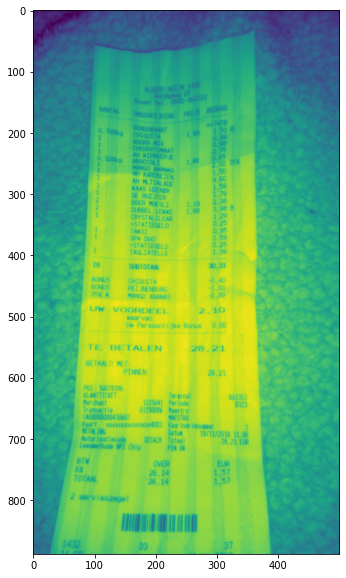

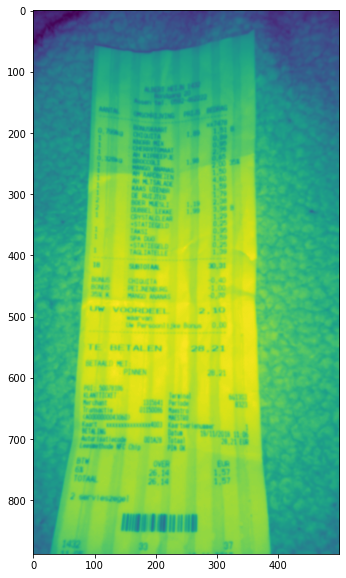

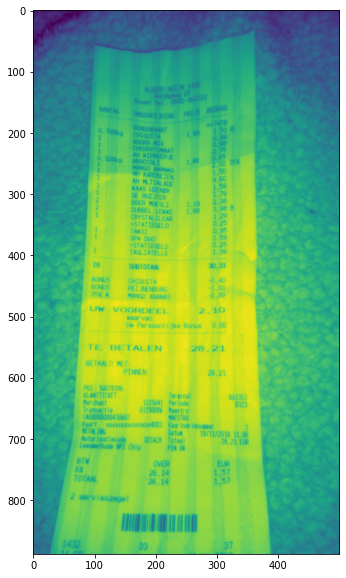

In [21]:
# convert the image to grayscale, blur it slightly, and then apply
# edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
# check to see if we should show the output of our edge detection
# procedure
show(gray)


In [18]:
# find contours in the edge map and sort them by size in descending
# order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [19]:
# initialize a contour that corresponds to the receipt outline
receiptCnt = None
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we can
    # assume we have found the outline of the receipt
    if len(approx) == 4:
        receiptCnt = approx
        break
# if the receipt contour is empty then our script could not find the
# outline and we should be notified
if receiptCnt is None:
    raise Exception(("Could not find receipt outline. "
    "Try debugging your edge detection and contour steps."))

Exception: Could not find receipt outline. Try debugging your edge detection and contour steps.

In [20]:
# check to see if we should draw the contour of the receipt on the
# image and then display it to our screen
if True:
    output = image.copy()
    cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
    cv2.imshow("Receipt Outline", output)
    cv2.waitKey(0)
# apply a four-point perspective transform to the *original* image to
# obtain a top-down bird's-eye view of the receipt
receipt = four_point_transform(orig, receiptCnt.reshape(4, 2) * ratio)

# show transformed image
cv2.imshow("Receipt Transform", imutils.resize(receipt, width=500))
cv2.waitKey(0)

error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2599: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'
